In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

def myfun(t, u):
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    R1 = np.sqrt((u[0]**2 + u[1]**2))
    R2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    R12 = np.sqrt(dx**2 + dy**2)
    q1 = -G*Ms/(R1**3)
    q2 = -G*Ms/(R2**3)
    q12 = -G*Mp2/(R12**3)
    q21 = -G*Mp1/(R12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

In [4]:
G = 6.67e-11 # m3 * kg-1 * s-2
Ms = 1.98e30 # mass sun in kg
Re = 150e9 #km distance between sun and earth
Mp1 = 0.001*Ms # mass planet 1
Mp2 = Mp1
Rp1 = Re
Rp2 = 0.95 * Rp1

# keplers law
k = 4*(np.pi**2)/ ( G*Ms) #constant of proportionality
Pp1 = np.sqrt(k*(Rp1**3))
Pp2 = np.sqrt(k*(Rp2**3)) #period of planet 2
Vp1 = (2*np.pi*Rp1)/Pp1 #orbital velocity planet 1
Vp2 = (2*np.pi*Rp2)/Pp2 #orbital velocity planet 2


In [5]:
#u[0] u[1] u[2] u[3] u[4] u[5] u[6] u[7]
#x1   y1    x2   y2  v1x  v1y  v2x  v2y

u0 = np.zeros((8,))
u0[0] = Rp1
u0[1] = 0
u0[2] = Rp2
u0[3] = 0
u0[4] = 0
u0[5] = Vp1
u0[6] = 0
u0[7] = -Vp2

In [6]:
Dt = 360
t0 = 0
tmax = 20*Pp1
t = np.arange(t0, tmax,Dt)

In [7]:
from scipy.integrate import solve_ivp
sol = solve_ivp(myfun, [t0,tmax], u0, method='DOP853', t_eval=t)

Text(0, 0.5, 'y (km)')

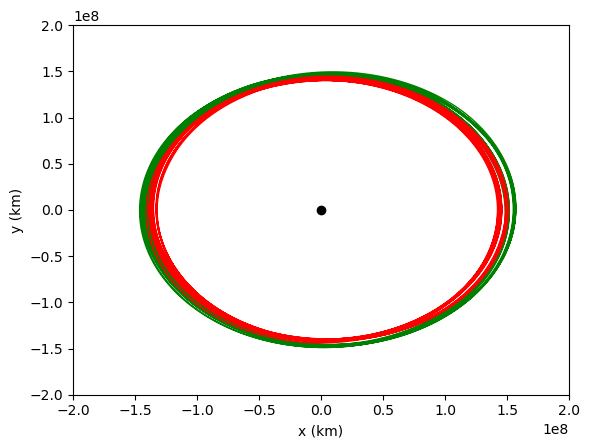

In [8]:
#plot the orgins in the x,y plane

fig1 = plt.figure()
ax = plt.subplot(1,1,1)
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
plt.plot(sol.y[0]/1000, sol.y[1]/1000, 'g-', lw=1) #planet 1
plt.plot(sol.y[2]/1000, sol.y[3]/1000, 'r-', lw=1)
plt.xlabel('x (km)')
plt.ylabel('y (km)')